In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [2]:
import os
import glob

from pandas.api.types import CategoricalDtype

HOME = "/home/kwatchar3/spauq-home/spauq/expt/music-source-seperation/results-2s"

results = glob.glob(os.path.join(HOME, "*.csv"))

dfs = []

for r in results:
    model_name = r.split("/")[-1].replace(".csv", "")
    df = pd.read_csv(r).rename(columns={'Unnamed: 0': 'title', 'Unnamed: 1': 'instrument'})
    df['model'] = model_name.replace("-", ": ")
    dfs.append(df)
    
df = pd.concat(dfs).reset_index()

dfa = df.groupby(['model', 'title']).mean(numeric_only=True).reset_index()
dfa['instrument'] = 'overall'
# dfm = df.groupby(['model'])[['SSR', 'SRR']].describe()

df = pd.concat([df, dfa]).reset_index()

model_dtype = df[df.instrument == 'vocals'].groupby('model')['SSR'].quantile(0.75).sort_values(ascending=False).index.tolist()
model_dtype = CategoricalDtype(model_dtype, ordered=True)
inst_dtype = CategoricalDtype(['overall', 'vocals', 'drums', 'bass', 'other'], ordered=True)

df['model'] = df['model'].astype(model_dtype)
df['instrument'] = df['instrument'].astype(inst_dtype)

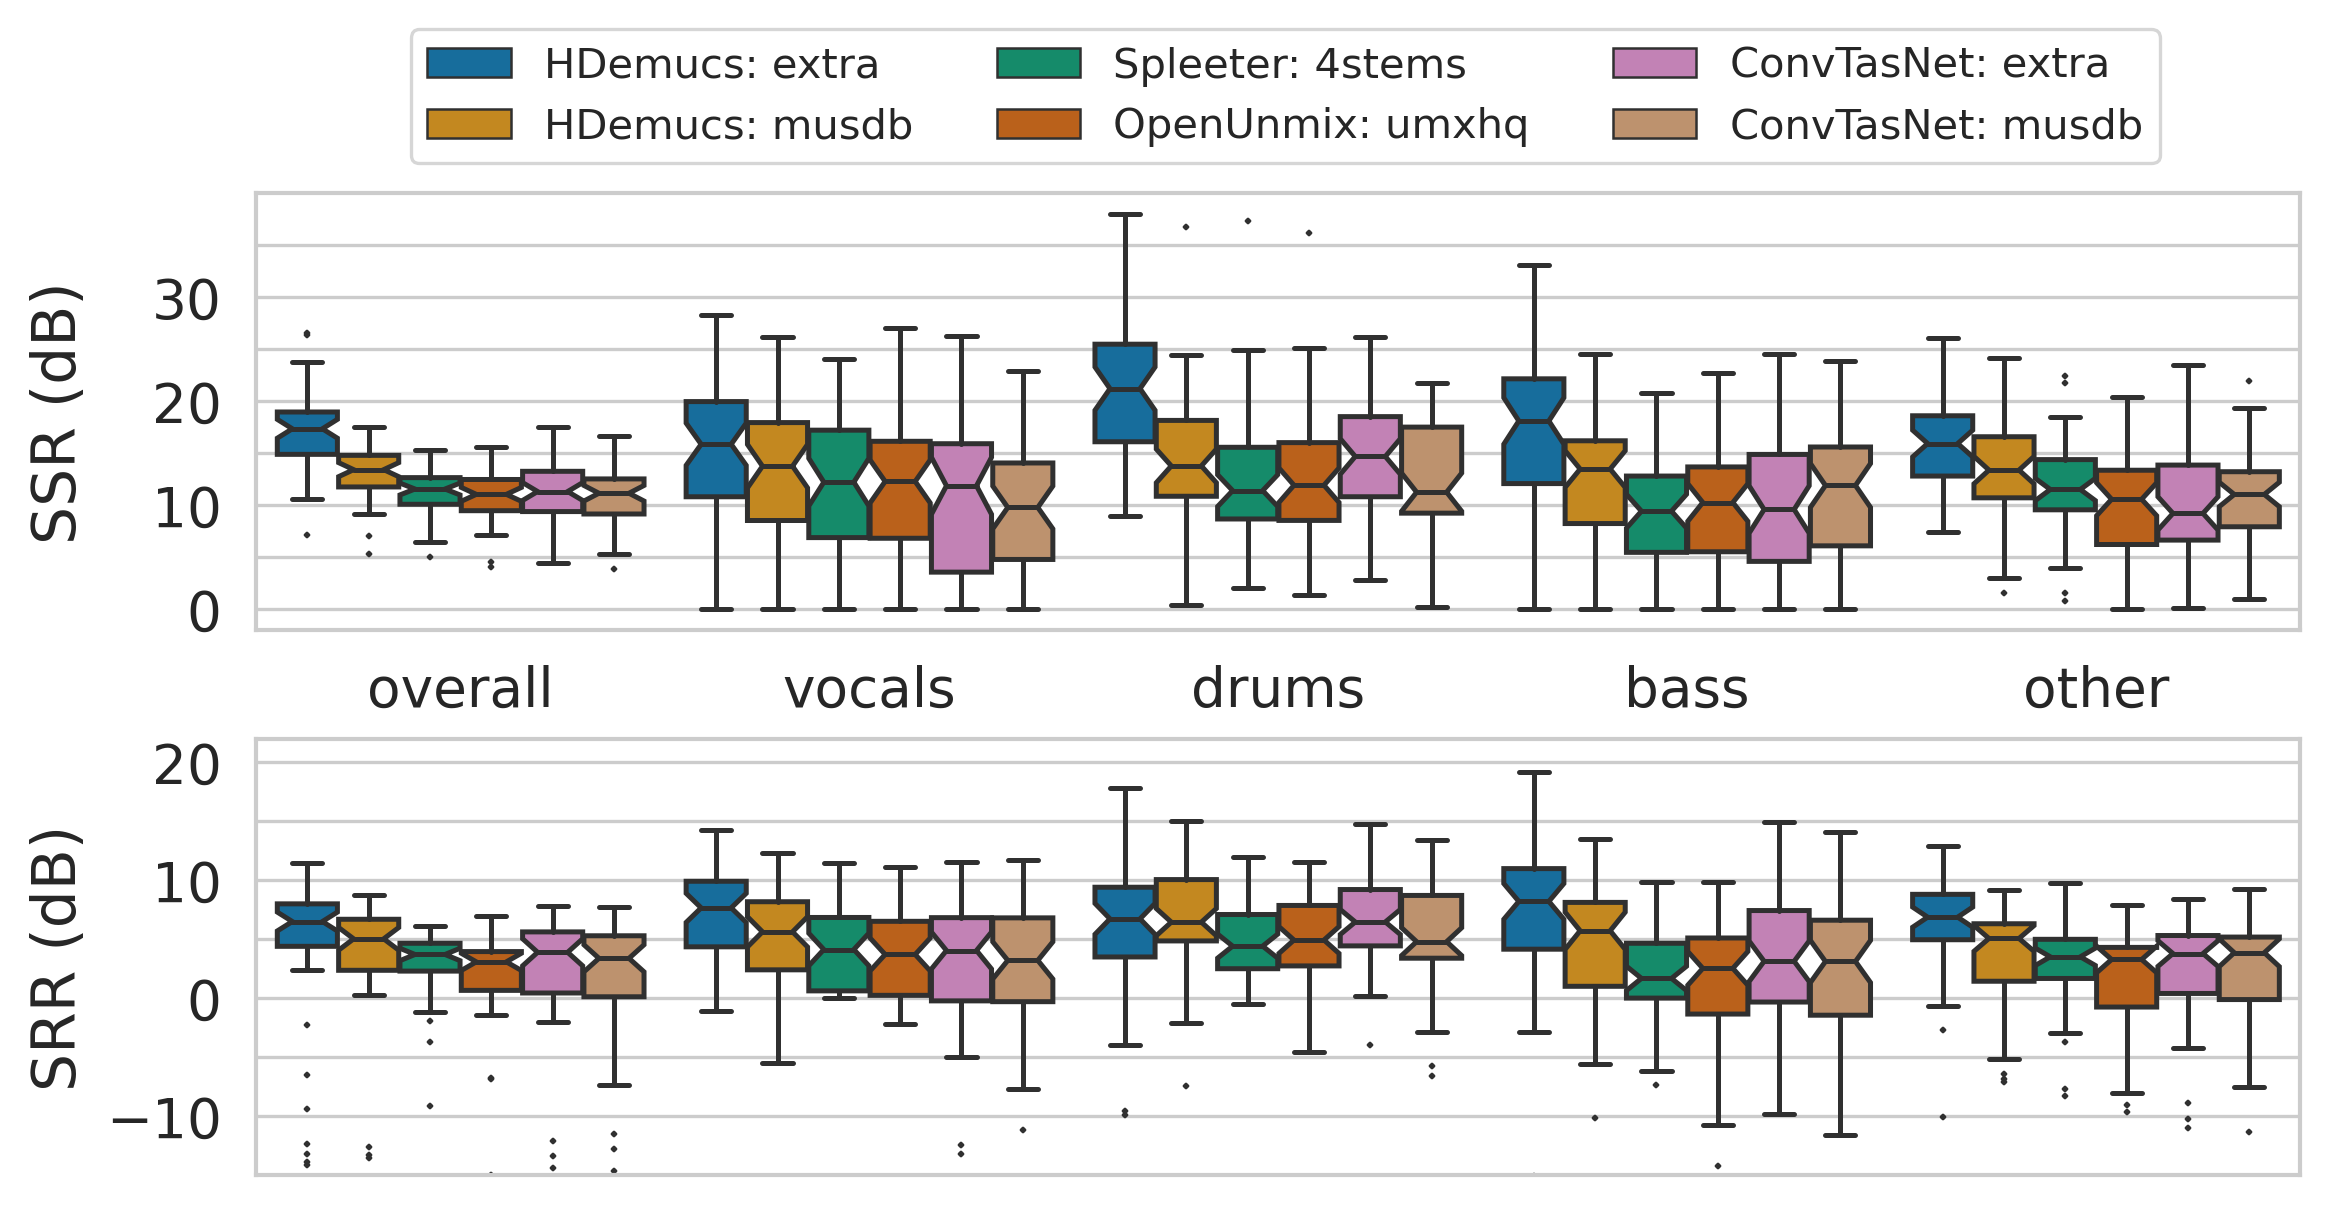

In [4]:
sns.set("paper", "whitegrid", "colorblind", font_scale=1.5)

f, ax = plt.subplots(2, 1, figsize=(8, 4), tight_layout=True, dpi=300)
kwargs = dict(showfliers=True, notch=True, fliersize=1, flierprops={"marker": "x"}, width=0.9)
sns.boxplot(df, y='SSR', hue='model', x='instrument', ax=ax[0], **kwargs)
sns.boxplot(df, y='SRR', hue='model', x='instrument', ax=ax[1], **kwargs)


ax[0].set_yticks(np.arange(0, 35, 10))
ax[0].set_yticks(np.arange(0, 40, 5), minor=True)
ax[1].set_yticks(np.arange(-10, 25, 10))
ax[1].set_yticks(np.arange(-10, 25, 5), minor=True)
ax[0].set(ylim=[-2, 40])
ax[1].set(ylim=[-15, 22])
ax[0].set(ylabel='SSR (dB)')
ax[1].set(ylabel='SRR (dB)')

for a in ax:
    a.grid(True, axis='y', which='minor')
    a.tick_params(axis='both', which='minor')
    a.set(xlabel=None)
    a.legend().remove()

plt.tight_layout()
f.align_ylabels(ax)
f.subplots_adjust(wspace=0, hspace=0.25)

h, l = ax[0].get_legend_handles_labels()
f.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.55, 1.1))#, fontsize=10)


ax[1].set(xticklabels=[])


plt.savefig("mss-musdb.pdf", bbox_inches='tight')
plt.show()